# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Isotope class.

In [3]:
RUN = pica.FullRun("example_data/HKDS2009_IsoWater_20191114_105042.csv")

Running the corrections for Oxygen 
 ... 
 ...
Checking: HoLm_low ...
Standard dev too high get rid of measurement 4
Checking: Krivspr ...
Standard dev is good
Checking: MSK ...
Standard dev is good
Checking: MSK-4 ...
Standard dev is good
Checking: Rus-3_low ...
Standard dev too high get rid of measurement 4
Checking: Sp-17-06-3 ...
Standard dev too high get rid of measurement 3
Checking: Sp-17-07-2 ...
Standard dev is good
Checking: Sp-17-10-3 ...
too high std. deviation
Checking: Sp-17-11-1 ...
Standard dev is good
Checking: Sp-18-01-1 ...
Standard dev is good
Checking: Sp-18-02-1 ...
Standard dev is good
Checking: Sp-18-02-4 ...
get rid of measurements  1 and 3
Checking: Sp-18-03-2 ...
Standard dev is good
Checking: Sp-18-03-3 ...
Standard dev is good
Checking: Sp-18-06-2 ...
get rid of measurements  4 and 2
Checking: Sp-18-07-2 ...
Standard dev too high get rid of measurement 2
Checking: Sp-18-09-3_low ...
Standard dev is good
Checking: chp-18-05 ...
Standard dev too high get rid 

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



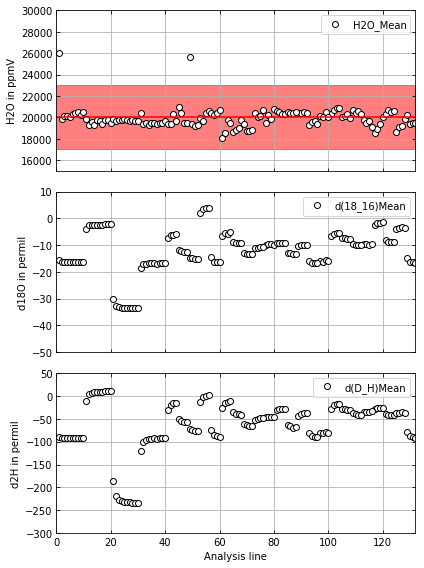

In [4]:
RUN.O18.plotSummary()

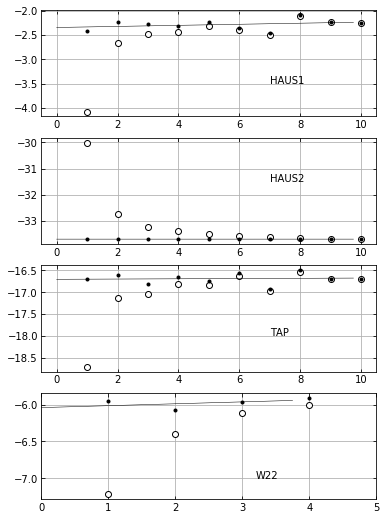

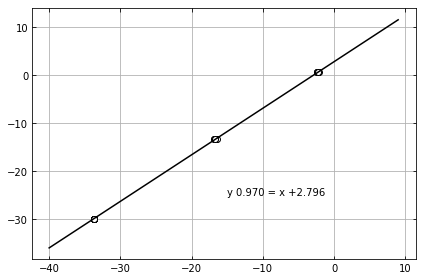

In [5]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

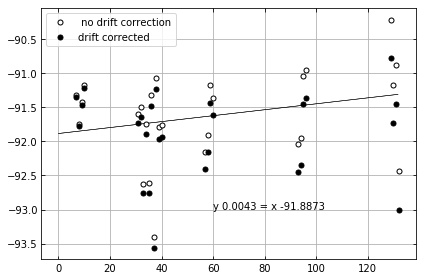

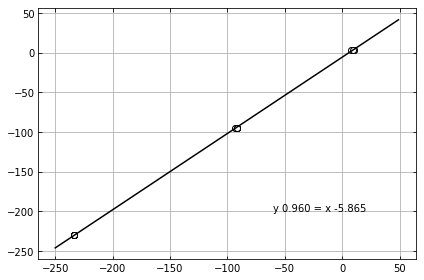

In [6]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

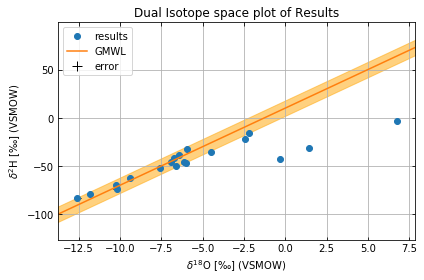

In [7]:
RUN.Plot()

#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [8]:
RUN.coeffs

O         H
1   0.866608  0.753851
2   0.968682  0.931383
3   0.985613  0.969711
4   0.990302  0.981438
5   0.993794  0.989396
6   0.996263  0.993260
7   0.997285  0.995698
8   0.998092  0.997509
9   1.000000  0.998656
10  1.000000  1.000000

In [9]:
RUN.suggestedReruns()

Checking for triplicates...
Some samples were not triplicated
Identifier 1  Identifier 2
Sp-18-06-2    YD             -2.193008
Name: d18O vsmow, dtype: float64


Checking for high standard deviations ...
Suggested reruns for following samples, which had high standard deviations
Identifier 1  Identifier 2
Sp-17-10-3    YD             -12.580137
Sp-18-02-4    YD             -10.197279
Sp-18-06-2    YD              -2.193008
TAP           _Control 3     -13.236758
HAUS1         _Standard        0.588319
TAP           _Standard      -13.379838
Name: d18O vsmow, dtype: float64


Checking for samples lying outside of the GWML ...
Suggested reruns for following samples, which were outside of the GMWL
Identifier 1    Identifier 2
HoLm_low        YD              1.443622
Krivspr         YD             -5.976094
Rus-3_low       YD             -0.303565
Sp-17-06-3      YD             -4.486442
Sp-17-07-2      YD             -2.450456
Sp-18-06-2      YD             -2.193008
Sp-18-09-3_low  YD   